In [1]:
import PIL
import os
import pandas as pd
import numpy as np
import moviepy.editor as mpy
import matplotlib.pyplot as plt
import random
from sklearn.cluster import DBSCAN, AgglomerativeClustering, MeanShift
from scipy.spatial import ConvexHull
from scipy.stats import wasserstein_distance as wdistance
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
from skimage.color import rgb2lab, lab2rgb
from sklearn.feature_extraction import image

from skimage.feature import hog
from skimage import data, exposure
from skimage.transform import resize

from torchvision import models
import torch
#https://gurus.pyimagesearch.com/lesson-sample-histogram-of-oriented-gradients-and-car-logo-recognition/

from BOX import BOX, cleanRepeatsBoxes
from BOX import *
import PIL

from detections import order_show
from detections import putDetections, cleanRepeats
from detections import coordinatesToDetections
from detections import lines_in_clusters
from abstract import *
from detections import shortestPath, paintingClusters, scaleAreaCLustersWithCustomShape, cleanRepeats

In [2]:
#vgg16 = models.vgg16(pretrained=True).to('cuda').eval()

In [3]:
images = []
for name in os.listdir('abstract'):
    image = PIL.Image.open(os.path.join('abstract', name))
    img = np.array(image)
    #plt.imshow(img)
    #plt.show()5
    images.append(img)
images = images[4:] + images[:4]

def test1():
    boxes_lists = []
    for i in range(1):
        boxes_list = []
        img = images[i]
        indexes_x, indexes_y, indexes, patch_size, data = abstractImagePointOfInterests(img)

        if len(indexes) != 0:
            im = putSquares(img,indexes_y[indexes], indexes_x[indexes], patch_size, patch_size)
            plt.figure(figsize=(10,10))
            plt.imshow(im)
            plt.show()
        else:
            plt.figure(figsize=(10,10))
            plt.imshow(img)
            plt.show()
    return boxes_lists

In [4]:
i = 9
verbose=True
img = images[i]
w = 200
k = 1.2
image_type = 'abstract'

In [ ]:
if image_type == 'abstract':
    indexes_x, indexes_y, indexes, patch_size, data = abstractImagePointOfInterests(img)

    if len(indexes) == 0:
        indexes = random.choices(range(len(indexes_x)), k=2)

    detections = coordinatesToDetections(indexes_x[indexes],indexes_y[indexes], patch_size, data)
    

400


Cleaning overlapping boxes...
Number of boxes reduced from 18 to 4
4
Scaling clusters according to the scores forming custom.shape...
110
200
110
200
110
200
110
200
178.0
178.0
302.0
302.0
314.0
314.0
148.0
148.0


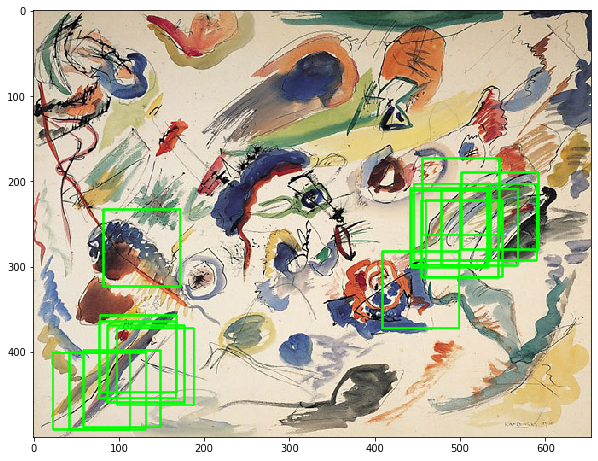

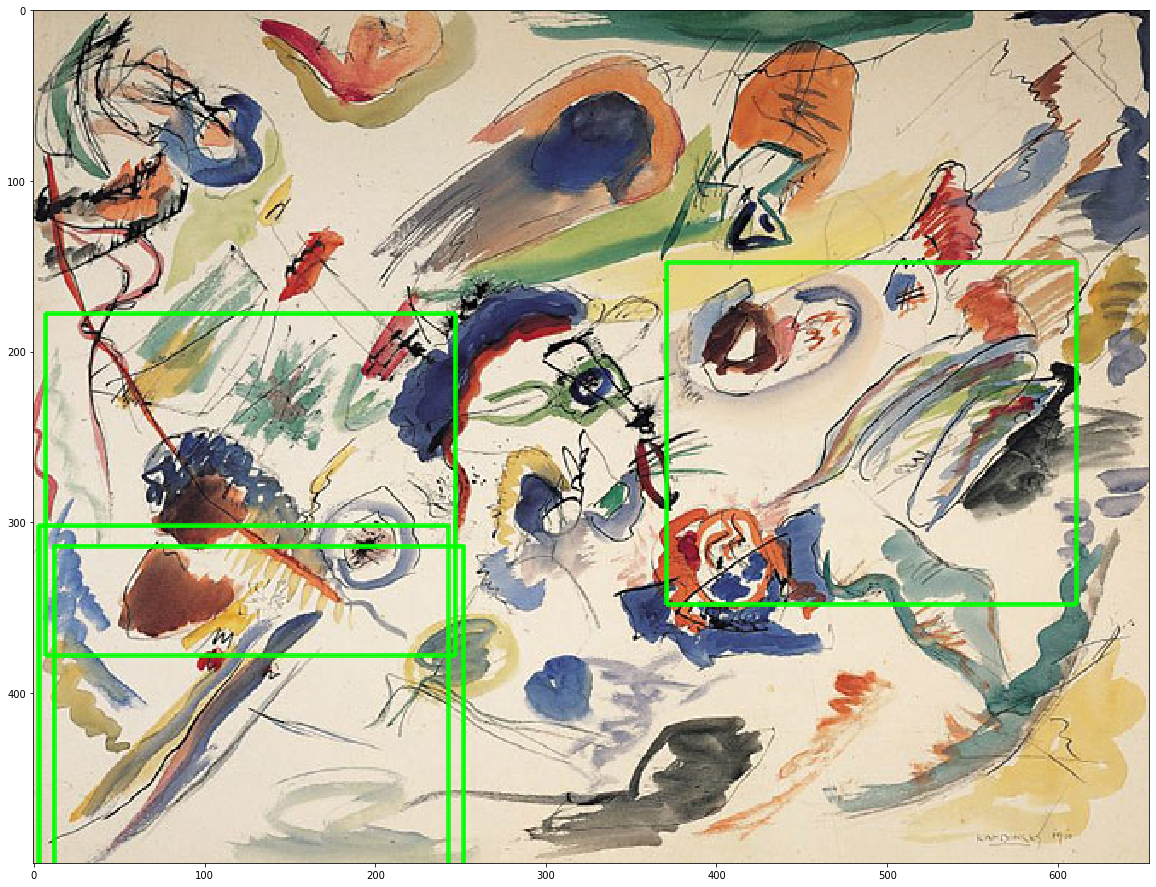

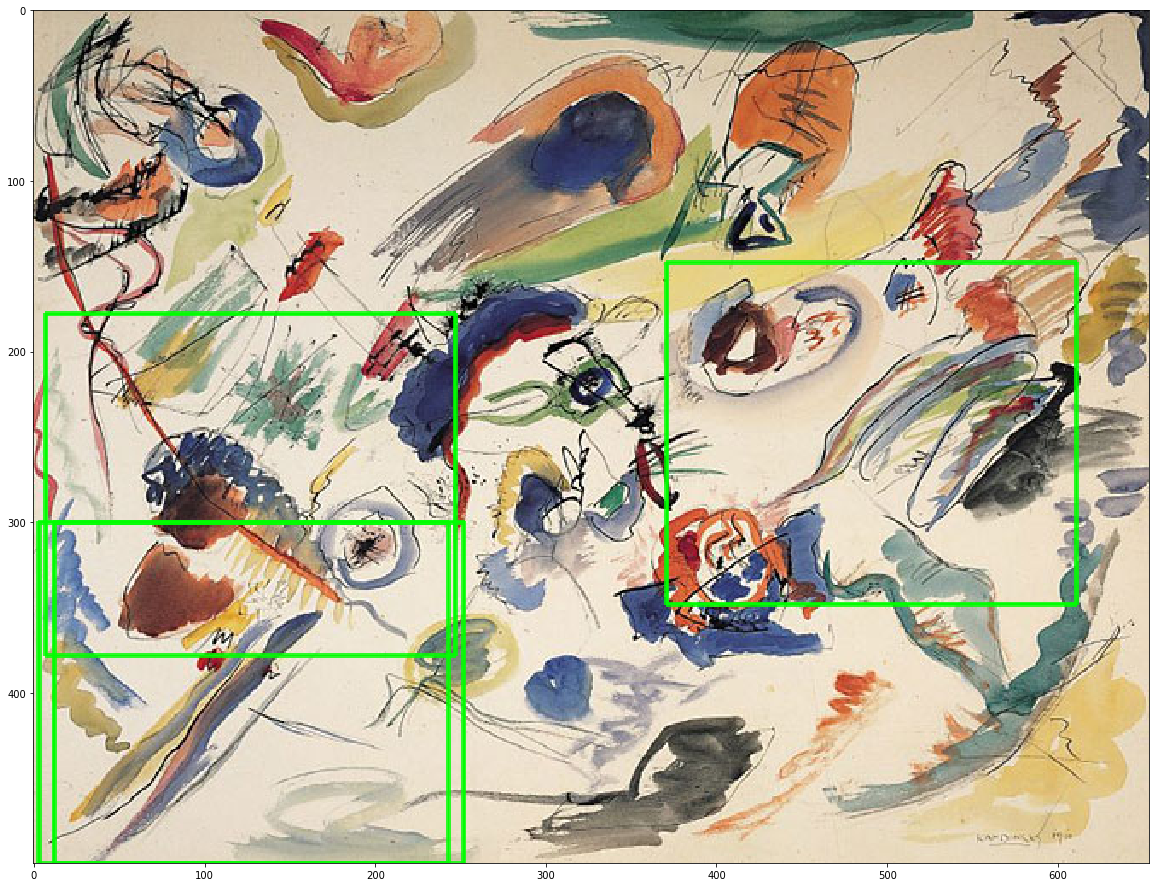

<Figure size 1440x1440 with 0 Axes>

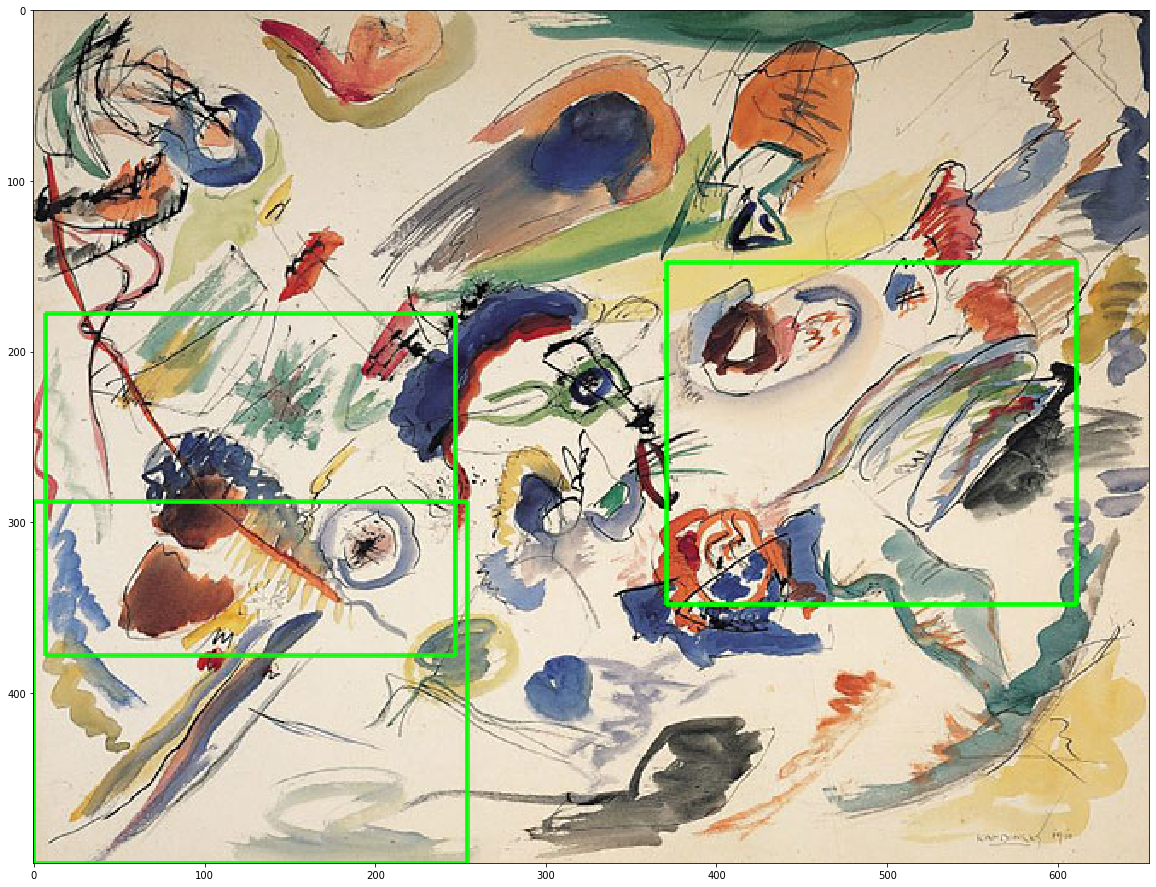

Cleaning overlapping boxes...
Number of boxes reduced from 3 to 2
2
0
lines
if
>0
for
[x : 178.000000, y : 7.000000, w : 200.000000, h : 240.000000]


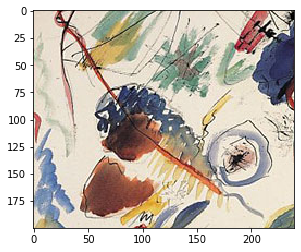

[x : 0.000000, y : 0.000000, w : 500.000000, h : 654.000000]
[x : 178.000000, y : 7.000000, w : 200.000000, h : 240.000000]


t:   1%|          | 3/538 [00:00<00:20, 25.66it/s, now=None]

Moviepy - Building video my.mp4.
Moviepy - Writing video my.mp4



t:  82%|████████▏ | 441/538 [00:00<00:00, 131.01it/s, now=None]

In [ ]:
cleanRepeats(detections)
detections, h_means, w_means, labels = scaleAreaCLustersWithCustomShape(detections, img.shape, k, w)


if verbose:
    im = putSquares(img,indexes_y[indexes], indexes_x[indexes], patch_size, patch_size)
    plt.figure(figsize=(10,10))
    plt.imshow(im)
    plt.show()
    
    plt.figure(figsize=(20,20))
    plt.imshow(putDetections(img, detections))
    plt.show()
    plt.figure(figsize=(20,20))
    plt.imshow(putDetections(img, detections, True, True))
    plt.show()
cluster_labels, cluster_boxes = order_show(detections, img.shape, k, min_zoom=4)

if verbose:
    plt.figure(figsize=(20,20))
    plt.imshow(putDetections(img, cluster_boxes, True, False))
    plt.show()
cleanRepeatsBoxes(cluster_boxes)

in_points, out_points, in_detections, out_detections, lines = lines_in_clusters(img, detections, cluster_labels, True)

paintingClusterBoxes = []
for i in range(len(cluster_boxes)):
    paintingClusterBox = paintingClusters(cluster_boxes[i], in_points[i], 
                     out_points[i], in_detections[i], out_detections[i], lines[i])
    paintingClusterBoxes.append(paintingClusterBox)
path = shortestPath(paintingClusterBoxes)
random.shuffle(path)

cluster_boxes = sorted(cluster_boxes, key=lambda b : [b.x, b.y])
frames = make_path_clusters0(img,detections, cluster_boxes, cluster_labels, 
                             in_points, out_points, in_detections, out_detections, lines, 
                             path, w = w, k = k)   

pil_frames = []
for i in range(len(frames)):
    fr = frames[i]
    fr = np.uint8(fr)
    frames[i] = fr
    pil_frames.append(PIL.Image.fromarray(fr))
    
try:
    pil_frames[0].save('my9.gif', save_all=True, append_images = pil_frames[1:], duration=30)
except:
    print("An error occured while saving a gif.")
    
try:
    clip = mpy.ImageSequenceClip(frames[20:], fps=30)
    clip.write_videofile('my.mp4', fps=30)
except:
    print("An error occured while saving an mp4.")